In [1]:
from datasets import load_dataset
from transformers import pipeline
from transformers.pipelines.pt_utils import KeyDataset
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score

/opt/homebrew/Caskroom/miniforge/base/envs/sentiment-analysis/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
imdb = load_dataset("data", data_files={"train":"train.csv", "test":"test.csv"})

In [4]:
pipe = pipeline("text-classification", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

In [30]:
test_df = imdb['test'].to_pandas()

In [42]:
labels = []
for out in tqdm(pipe(KeyDataset(imdb['test'], "review"), batch_size= 8, truncation="only_first")):
    labels.append(out['label'])

  0%|          | 0/2500 [00:00<?, ?it/s]

20000it [1:02:01,  5.37it/s]                       


In [67]:
def confusion_matrix_heatmap(mat, data, title):
    labels = data['sentiment'].unique()
    sns.heatmap(mat.T, square = True, annot=True, xticklabels=labels, yticklabels=labels, vmin=0, vmax=1, cmap="Blues",)
    plt.title(title)
    plt.xlabel("true labels")
    plt.ylabel("predicted label")
    plt.show()

In [47]:
test_df['predicted'] = labels
test_df['predicted'] = test_df["predicted"].str.lower()

In [50]:
accuracy_score(test_df['sentiment'], test_df['predicted'])

0.8891

In [68]:
cf = confusion_matrix(test_df['sentiment'], test_df['predicted'], normalize="true")

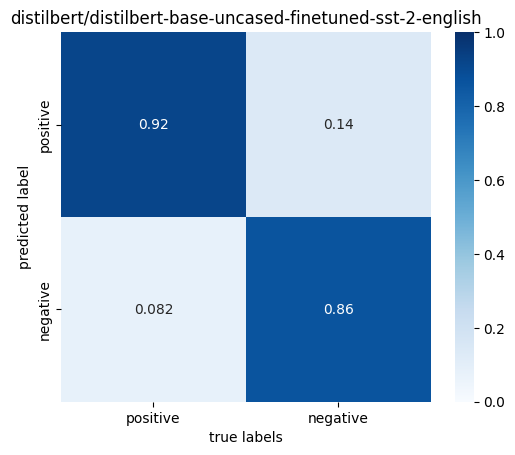

In [69]:
confusion_matrix_heatmap(cf, test_df, "distilbert/distilbert-base-uncased-finetuned-sst-2-english")